### Gram Stain Analysis Cohort 1, Kaplan Lab 2025

#### Zuriahn Yun

In [ ]:
# Installs
# %pip install pandas
# %pip install Pillow
# %pip install numpy as np

# Imports
import numpy as np
import pandas as pd
from PIL import Image
import os
import re
import matplotlib.pyplot as plt

In [ ]:
# Turn image into a Dataframe, 
def image_to_df(image):
  # imageArray will have shape (height,width,3)
  imageArray = np.array(image)
  # reshaped size is (height * width, 3)
  reshaped = imageArray.reshape(-1,3)
  return reshaped

# Function to Calculate percentages
def percent(value,total):
  return (value / total) * 100

def darkness_luminosity(row):
        # This is the NTSC formula to convert RGB values into Grayscale
        # "This formula closely represents the average person's relative perception of the brightness of red, green and blue light."
        # The smaller the values the darker the pixel
       return (0.299 * row['Red'] + 0.587 * row['Green'] + 0.114 * row['Blue'])
    
# Tiff to JPG Function and save with same filename as given replaced with "jpg"
def saveTifftoJPG(base_path):
  tiff_image = Image.open(base_path)
  new_path = base_path[:-3] + "jpg"
  jpge_image = tiff_image.convert("RGB")
  jpge_image.save(new_path)


# TIff to Jpg, returns the JPG image but does not save it
def convertTifftoJPG(base_path):
  tiff_image = Image.open(base_path)
  new_path = base_path[:-3] + "jpg"
  jpgImage = tiff_image.convert("RGB")
  return jpgImage

# Greater than this is considered white or nothing
white_threshold = 225

# Greater than this is labeled as gram positive, less than this is a black pixel 
gram_positive_threshold = 35

# This is for calculting the positive negative percentages for a single ImageDataFram, might have to be edited for 5 images
def PositiveNegativePercentages(ImageDataFrame):
  white_threshold = 225
  gram_positive_threshold = 35
  white = (ImageDataFrame['Darkness'] > white_threshold).sum()
  gram_positive = (ImageDataFrame['Darkness'] < gram_positive_threshold).sum()
  gram_negative = ((gram_positive_threshold < ImageDataFrame['Darkness']) & (ImageDataFrame['Darkness'] < white_threshold)).sum()
  
# This will prints the percents of each type 
def printPercents(ImageDataFrame,white,gram_positive,gram_negative):
  print('Percent of White ' + str(percent(white,len(ImageDataFrame))) + '%')
  print('Percent of gram positive ' + str(percent(gram_positive ,len(ImageDataFrame)))+ '%')
  print('Percent of gram negative ' + str(percent(gram_negative, len(ImageDataFrame)))+ '%')
  
def extract_numbers(text):
  numbers_str = re.findall(r'\d+', text)
  numbers_int = [int(num) for num in numbers_str]
  return numbers_int

In [ ]:
# Path to Kaplan Lab HDD
# "D:" Goes to the HDD, After that inset file name
hddPath = "D:"
folderName = "Gram Stain Cohort 1"
folderPath = hddPath + folderName

# Hashmap to Hold all of the Dataframes for each mouse and day
miceNames = {}

# Iterate through files in folder Path
for filename in os.listdir(folderPath):
    fileTypeTag = str(filename[-3:]).strip()
    nameSplit = filename.split("_")
    dayNumber = extract_numbers(nameSplit[0])[0]
    imageNumber = nameSplit[1]
    name = nameSplit[2]
    fileTypeTag = str(filename[-3:]).strip()
    
    # Counting the Number of Photos 
    if name in miceNames:
        currLists = miceNames[name]
        
        thislist = currLists[dayNumber - 1]
        thislist.append(filename)
    else:
        miceNames[name] = days = [[] for _ in range(15)]
        currLists = miceNames[name]
        
        thislist = currLists[dayNumber - 1]
        thislist.append(filename)

In [ ]:
import pandas as pd

def image_to_df(image):
    imageArray = np.array(image)
    reshaped = imageArray.reshape(-1, 3)
    df = pd.DataFrame(reshaped, columns=["Red", "Green", "Blue"])
    df["Darkness"] = df.apply(darkness_luminosity, axis=1)
    return df

def get_mouse_summary_df(mouse_name, folderPath):
    listofDays = miceNames.get(mouse_name)
    if not listofDays:
        print(f"No data for mouse: {mouse_name}")
        return None

    # For each day, calculate percentages and store in a list
    results = []

    for day_index in range(len(listofDays)):
        image_files = listofDays[day_index]
        if len(image_files) == 0:
            continue

        # Combine all image data from this day into one big DataFrame
        day_df = pd.DataFrame()

        for filename in image_files:
            full_path = os.path.join(folderPath, filename)

            if filename.lower().endswith(("tif", "tiff")):
                image = convertTifftoJPG(full_path)
            else:
                image = Image.open(full_path)

            single_image_df = image_to_df(image)
            day_df = pd.concat([day_df, single_image_df], ignore_index=True)

        # Calculate percentages
        total_pixels = len(day_df)
        white_pixels = (day_df['Darkness'] > white_threshold).sum()
        gram_pos = (day_df['Darkness'] < gram_positive_threshold).sum()
        gram_neg = ((day_df['Darkness'] >= gram_positive_threshold) & (day_df['Darkness'] <= white_threshold)).sum()

        results.append({
            "Day": day_index + 1,
            "Percent White": percent(white_pixels, total_pixels),
            "Percent Gram Positive": percent(gram_pos, total_pixels),
            "Percent Gram Negative": percent(gram_neg, total_pixels)
        })

    df = pd.DataFrame(results)
    df.to_csv(mouse_name, index=False)
    return df

In [10]:
# Finished, mouseRJ1-2 mouseRJ1-4
# Remaining, 
mousenames = ["mouseRJ1-5","mouseRJ1-6", "mouseRJ1-7","mouseRJ1-8", "mouseRJ1-9","mouseRJ1-3"]
for name in mousenames:
    get_mouse_summary_df(name, folderPath)

In [9]:
print(miceNames.keys())

dict_keys(['mouseRJ1-2', 'mouseRJ1-4', 'mouseRJ1-5', 'mouseRJ1-6', 'mouseRJ1-7', 'mouseRJ1-8', 'mouseRJ1-9', 'mouseRJ1-3'])


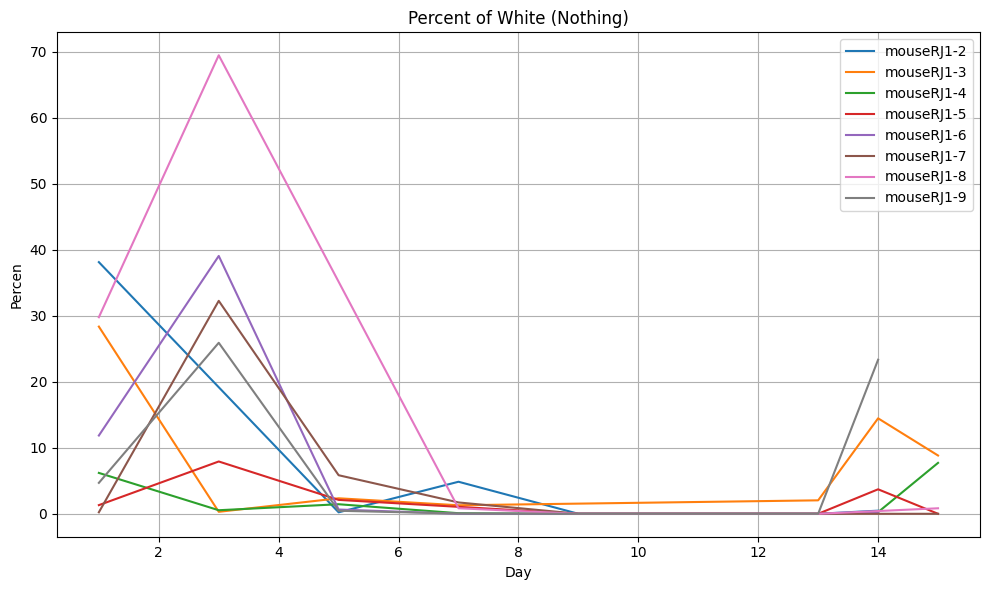

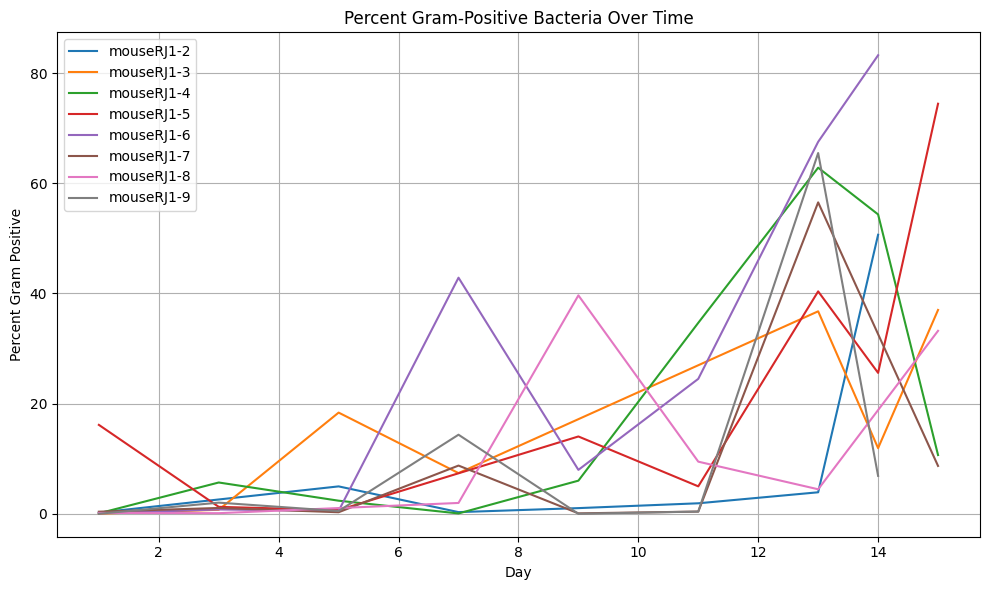

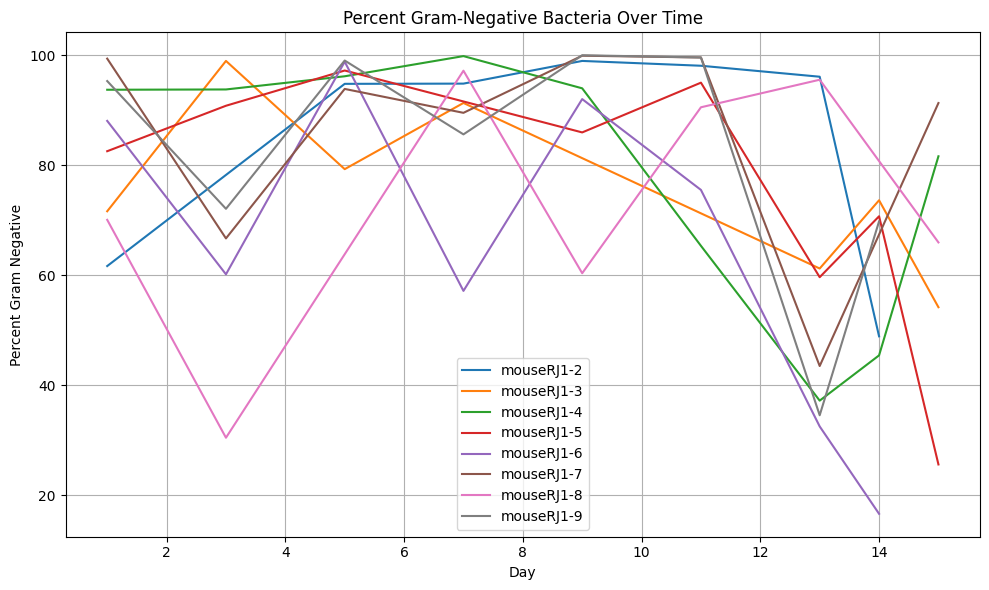

In [ ]:
# List of mouse CSV filenames
mouse_files = [
    "mouseRJ1-2.csv", "mouseRJ1-3.csv", "mouseRJ1-4.csv", "mouseRJ1-5.csv",
    "mouseRJ1-6.csv", "mouseRJ1-7.csv", "mouseRJ1-8.csv", "mouseRJ1-9.csv"
]

# Read all CSV files into a dictionary
mouse_data = {}
for file in mouse_files:
    mouse_name = file.split(".")[0]  # e.g., "mouseRJ1-2"
    df = pd.read_csv(file)
    mouse_data[mouse_name] = df

# ----- Plot 1: Percent White -----
plt.figure(figsize=(10, 6))
for mouse, df in mouse_data.items():
    plt.plot(df['Day'], df['Percent White'], label=mouse)
plt.xlabel("Day")
plt.ylabel("Percen")
plt.title("Percent of White (Nothing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Plot 2: Percent Gram Positive -----
plt.figure(figsize=(10, 6))
for mouse, df in mouse_data.items():
    plt.plot(df['Day'], df['Percent Gram Positive'], label=mouse)
plt.xlabel("Day")
plt.ylabel("Percent Gram Positive")
plt.title("Percent Gram-Positive Bacteria Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----- Plot 3: Percent Gram Negative -----
plt.figure(figsize=(10, 6))
for mouse, df in mouse_data.items():
    plt.plot(df['Day'], df['Percent Gram Negative'], label=mouse)
plt.xlabel("Day")
plt.ylabel("Percent Gram Negative")
plt.title("Percent Gram-Negative Bacteria Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
mouse_filenames = [
    "mouseRJ1-2.csv", "mouseRJ1-3.csv", "mouseRJ1-4.csv", "mouseRJ1-5.csv",
    "mouseRJ1-6.csv", "mouseRJ1-7.csv", "mouseRJ1-8.csv", "mouseRJ1-9.csv"
]
dfs = []

CBD = ["2","3","4","5"]
Vehicle = ["6","7","8","9"]

for filename in mouse_filenames:
    df = pd.read_csv(filename)
    df['Model'] = str(filename[:-4])
    Number = str(filename[-5])
    if Number in CBD:
        df['Condition'] = "CBD Dosed"
    else:
        df['Condition'] = "Vehicle"
    # Putting Model Column in the first index 
    cols = ['Model'] + ['Condition']  + [col for col in df.columns if col != 'Model' and col != 'Condition']
    df = df[cols]
    dfs.append(df)
    
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df)
combined_df.to_csv("Cohort1AnalysisUpdated.csv", index=False)

         Model  Condition  Day  Percent White  Percent Gram Positive  \
0   mouseRJ1-2  CBD Dosed    1      38.113021               0.229008   
1   mouseRJ1-2  CBD Dosed    5       0.223640               4.980773   
2   mouseRJ1-2  CBD Dosed    7       4.853458               0.310930   
3   mouseRJ1-2  CBD Dosed    9       0.000000               1.037768   
4   mouseRJ1-2  CBD Dosed   11       0.000000               1.913100   
..         ...        ...  ...            ...                    ...   
57  mouseRJ1-9    Vehicle    7       0.036039              14.358138   
58  mouseRJ1-9    Vehicle    9       0.000000               0.006735   
59  mouseRJ1-9    Vehicle   11       0.000000               0.410026   
60  mouseRJ1-9    Vehicle   13       0.000000              65.475514   
61  mouseRJ1-9    Vehicle   14      23.331626               6.887160   

    Percent Gram Negative  
0               61.657972  
1               94.795587  
2               94.835612  
3               98.9622

In [1]:
import cv2

# Load image
img = cv2.imread('day11_image1_mouseRJ1-4_ch00_SV.jpg')

if img is None:
    print("Image not found! Check the file path.")
    exit()

def show_coords(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        b, g, r = img[y, x]  # OpenCV uses BGR format
        print(f"Clicked at ({x}, {y}): RGB = ({r}, {g}, {b})")

# Create window and bind callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', show_coords)

# Display the image
while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:  # ESC to quit
        break

cv2.destroyAllWindows()

Clicked at (432, 257): RGB = (118, 120, 161)
Clicked at (421, 279): RGB = (118, 117, 151)
Clicked at (1189, 253): RGB = (128, 70, 84)
Clicked at (1113, 287): RGB = (122, 123, 153)
Clicked at (367, 137): RGB = (113, 118, 148)
Clicked at (1104, 230): RGB = (117, 116, 147)
Clicked at (1078, 200): RGB = (116, 114, 151)
Clicked at (1109, 208): RGB = (120, 121, 152)
Clicked at (1123, 216): RGB = (125, 125, 151)
Clicked at (466, 228): RGB = (118, 117, 151)
Clicked at (774, 30): RGB = (119, 120, 150)


KeyboardInterrupt: 